In [73]:
import openml
import pandas as pd
from sklearn import preprocessing, pipeline, ensemble
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [2]:
openml.config.apikey = ''

Download the OpenML dataset representation, 

# Attribute description:
    Status of existing checking account, in Deutsche Mark.
    Duration in months
    Credit history (credits taken, paid back duly, delays, critical accounts)
    Purpose of the credit (car, television,...)
    Credit amount
    Status of savings account/bonds, in Deutsche Mark.
    Present employment, in number of years.
    Installment rate in percentage of disposable income
    Personal status (married, single,...) and sex
    Other debtors / guarantors
    Present residence since X years
    Property (e.g. real estate)
    Age in years
    Other installment plans (banks, stores)
    Housing (rent, own,...)
    Number of existing credits at this bank
    Job
    Number of people being liable to provide maintenance for
    Telephone (yes,no)
    Foreign worker (yes,no)

# Get Classification Task 
https://www.openml.org/t/31

In [3]:
task = openml.tasks.get_task(31)

In [4]:
from pprint import pprint

In [5]:
pprint(vars(task))

{'class_labels': ['good', 'bad'],
 'cost_matrix': None,
 'dataset_id': 31,
 'estimation_parameters': {'number_folds': '10',
                           'number_repeats': '1',
                           'percentage': '',
                           'stratified_sampling': 'true'},
 'estimation_procedure': {'data_splits_url': 'https://www.openml.org/api_splits/get/31/Task_31_splits.arff',
                          'parameters': {'number_folds': '10',
                                         'number_repeats': '1',
                                         'percentage': '',
                                         'stratified_sampling': 'true'},
                          'type': 'crossvalidation'},
 'evaluation_measure': None,
 'split': None,
 'target_name': 'class',
 'task_id': 31,
 'task_type': 'Supervised Classification',
 'task_type_id': 1}


# Get dataset 

In [6]:
dataset = openml.datasets.get_dataset(31)

# Create Data Frame

In [7]:
X, y, attribute_names = dataset.get_data(target=dataset.default_target_attribute, return_attribute_names=True)

In [8]:
data = pd.DataFrame(X, columns=attribute_names)

In [9]:
data.shape

(1000, 20)

In [10]:
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,0.0,6.0,4.0,3.0,1169.0,4.0,4.0,4.0,2.0,0.0,4.0,0.0,67.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0
1,1.0,48.0,2.0,3.0,5951.0,0.0,2.0,2.0,1.0,0.0,2.0,0.0,22.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0
2,3.0,12.0,4.0,6.0,2096.0,0.0,3.0,2.0,2.0,0.0,3.0,0.0,49.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0
3,0.0,42.0,2.0,2.0,7882.0,0.0,3.0,2.0,2.0,2.0,4.0,1.0,45.0,2.0,2.0,1.0,2.0,2.0,0.0,0.0
4,0.0,24.0,3.0,0.0,4870.0,0.0,2.0,3.0,2.0,0.0,4.0,3.0,53.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0


In [11]:
data.iloc[:,:10].head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties
0,0.0,6.0,4.0,3.0,1169.0,4.0,4.0,4.0,2.0,0.0
1,1.0,48.0,2.0,3.0,5951.0,0.0,2.0,2.0,1.0,0.0
2,3.0,12.0,4.0,6.0,2096.0,0.0,3.0,2.0,2.0,0.0
3,0.0,42.0,2.0,2.0,7882.0,0.0,3.0,2.0,2.0,2.0
4,0.0,24.0,3.0,0.0,4870.0,0.0,2.0,3.0,2.0,0.0


In [12]:
data.iloc[:,10:].head()

,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,4.0,0.0,67.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0
1,2.0,0.0,22.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0
2,3.0,0.0,49.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0
3,4.0,1.0,45.0,2.0,2.0,1.0,2.0,2.0,0.0,0.0
4,4.0,3.0,53.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0


In [13]:
y

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
checking_status           1000 non-null float32
duration                  1000 non-null float32
credit_history            1000 non-null float32
purpose                   1000 non-null float32
credit_amount             1000 non-null float32
savings_status            1000 non-null float32
employment                1000 non-null float32
installment_commitment    1000 non-null float32
personal_status           1000 non-null float32
other_parties             1000 non-null float32
residence_since           1000 non-null float32
property_magnitude        1000 non-null float32
age                       1000 non-null float32
other_payment_plans       1000 non-null float32
housing                   1000 non-null float32
existing_credits          1000 non-null float32
job                       1000 non-null float32
num_dependents            1000 non-null float32
own_telephone             1000

In [15]:
data.describe()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.577000,20.903000,2.545000,2.828000,3271.258057,1.105000,2.384000,2.973000,1.682000,0.145000,2.84500,1.358000,35.546001,1.6750,0.929000,1.407000,1.904000,1.155000,0.404000,0.037000
std,1.257635,12.058832,1.083117,2.744443,2822.736572,1.580023,1.208307,1.118714,0.708081,0.477707,1.10372,1.050211,11.375466,0.7056,0.531261,0.577656,0.653614,0.362086,0.490944,0.188857
min,0.000000,4.000000,0.000000,0.000000,250.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,19.000000,0.0000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,12.000000,2.000000,1.000000,1365.500000,0.000000,2.000000,2.000000,1.000000,0.000000,2.00000,0.000000,27.000000,2.0000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,1.000000,18.000000,2.000000,2.000000,2319.500000,0.000000,2.000000,3.000000,2.000000,0.000000,3.00000,1.000000,33.000000,2.0000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000
75%,3.000000,24.000000,4.000000,3.000000,3972.250000,2.000000,4.000000,4.000000,2.000000,0.000000,4.00000,2.000000,42.000000,2.0000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
max,3.000000,72.000000,4.000000,10.000000,18424.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.00000,3.000000,75.000000,2.0000,2.000000,4.000000,3.000000,2.000000,1.000000,1.000000


# Correlation

In [16]:
corr = data.corr()

In [17]:
corr.abs()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
checking_status,1.000000,0.072013,0.192191,0.028783,0.042705,0.222867,0.106339,0.005280,0.043261,0.127737,0.042234,0.032260,0.059751,0.046841,0.022424,0.076005,0.040663,0.014145,0.066296,0.026758
duration,0.072013,1.000000,0.077186,0.147492,0.624984,0.047661,0.057381,0.074749,0.014789,0.024490,0.034067,0.303971,0.036136,0.054884,0.157049,0.011284,0.210910,0.023834,0.164718,0.138196
credit_history,0.192191,0.077186,1.000000,0.090336,0.059905,0.039058,0.138225,0.044375,0.042171,0.040676,0.063198,0.053777,0.147086,0.121973,0.062095,0.437066,0.010350,0.011550,0.052370,0.013873
purpose,0.028783,0.147492,0.090336,1.000000,0.068474,0.018684,0.016013,0.048369,0.000157,0.017607,0.038221,0.010966,0.001312,0.096612,0.018391,0.054935,0.008085,0.032577,0.078371,0.099725
credit_amount,0.042705,0.624984,0.059905,0.068474,1.000000,0.064630,0.008367,0.271316,0.016091,0.027832,0.028926,0.311599,0.032716,0.046008,0.135632,0.020795,0.285385,0.017142,0.276995,0.050050
savings_status,0.222867,0.047661,0.039058,0.018684,0.064630,1.000000,0.120950,0.021993,0.017349,0.105069,0.091424,0.018948,0.084245,0.001908,0.006505,0.021644,0.011709,0.027514,0.087208,0.007095
employment,0.106339,0.057381,0.138225,0.016013,0.008367,0.120950,1.000000,0.126161,0.111278,0.008116,0.245081,0.087187,0.256227,0.040154,0.111126,0.125791,0.101225,0.097192,0.060518,0.027232
installment_commitment,0.005280,0.074749,0.044375,0.048369,0.271316,0.021993,0.126161,1.000000,0.119308,0.011398,0.049302,0.053391,0.058266,0.000983,0.089405,0.021669,0.097755,0.071207,0.014413,0.090024
personal_status,0.043261,0.014789,0.042171,0.000157,0.016091,0.017349,0.111278,0.119308,1.000000,0.050634,0.027269,0.006940,0.007783,0.036765,0.099579,0.064672,0.011956,0.122165,0.027275,0.065618
other_parties,0.127737,0.024490,0.040676,0.017607,0.027832,0.105069,0.008116,0.011398,0.050634,1.000000,0.025678,0.155450,0.029873,0.059023,0.065889,0.025447,0.057963,0.020400,0.075035,0.117999


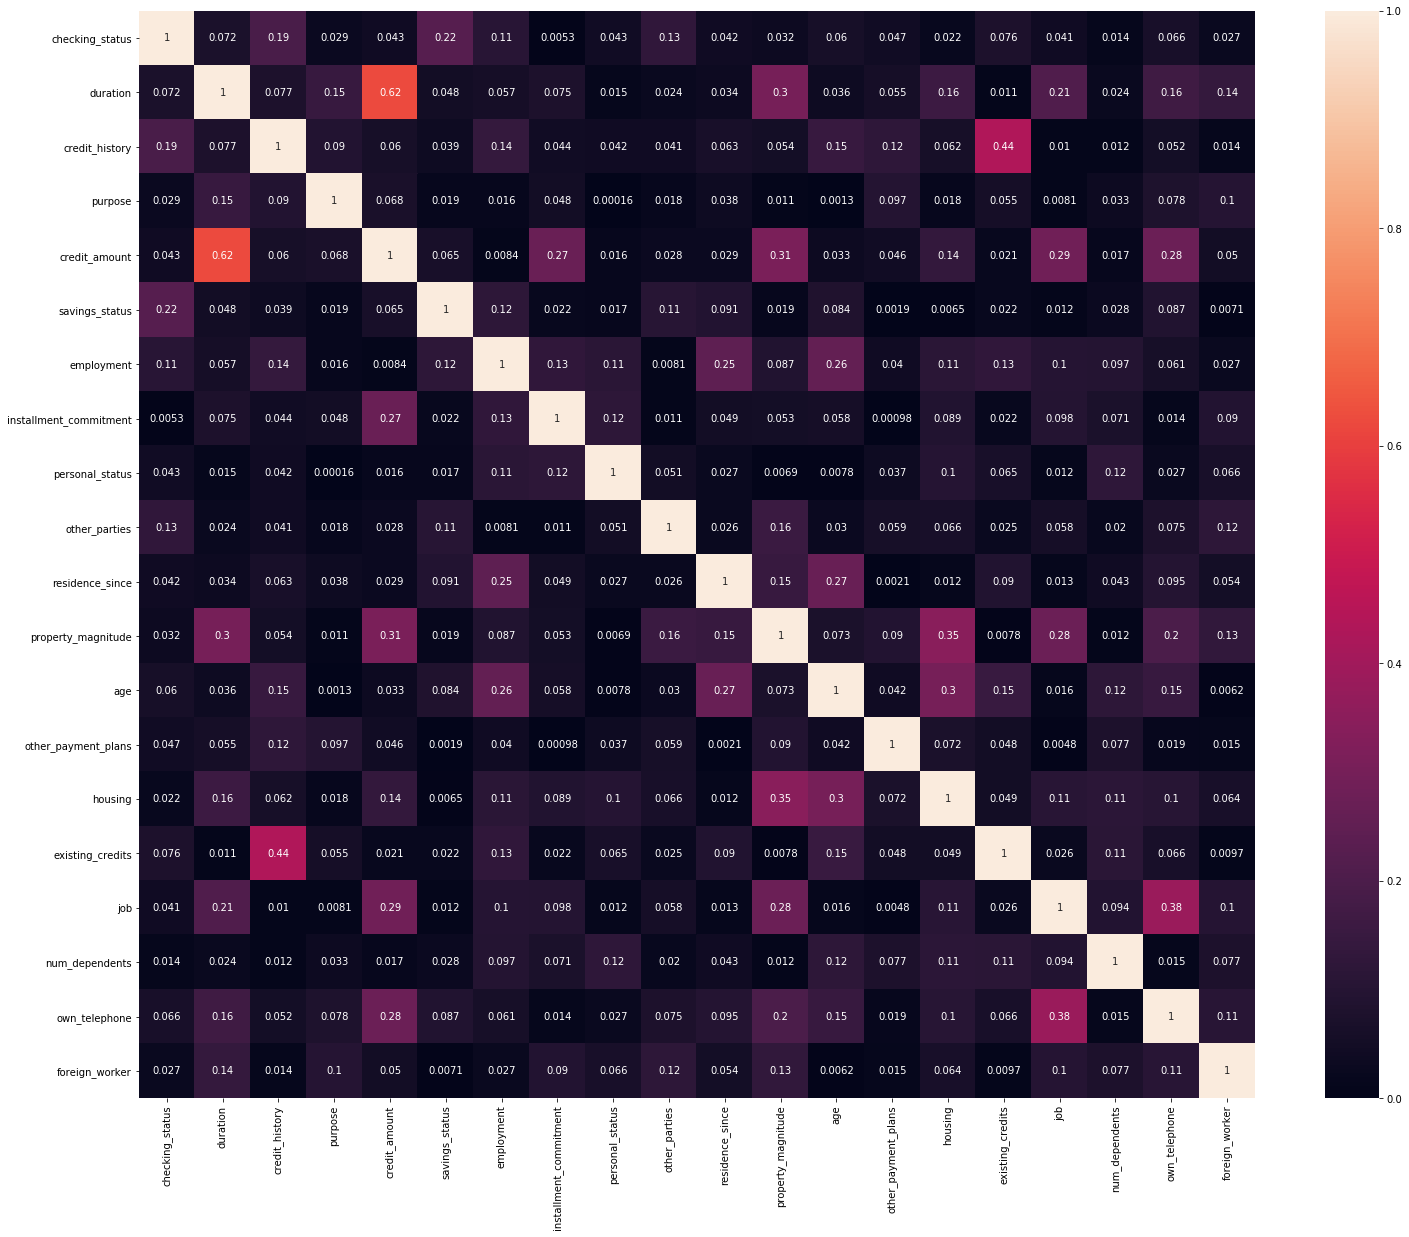

In [18]:
plt.figure(figsize = (25,20))
sns.heatmap(corr.abs(), 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True)

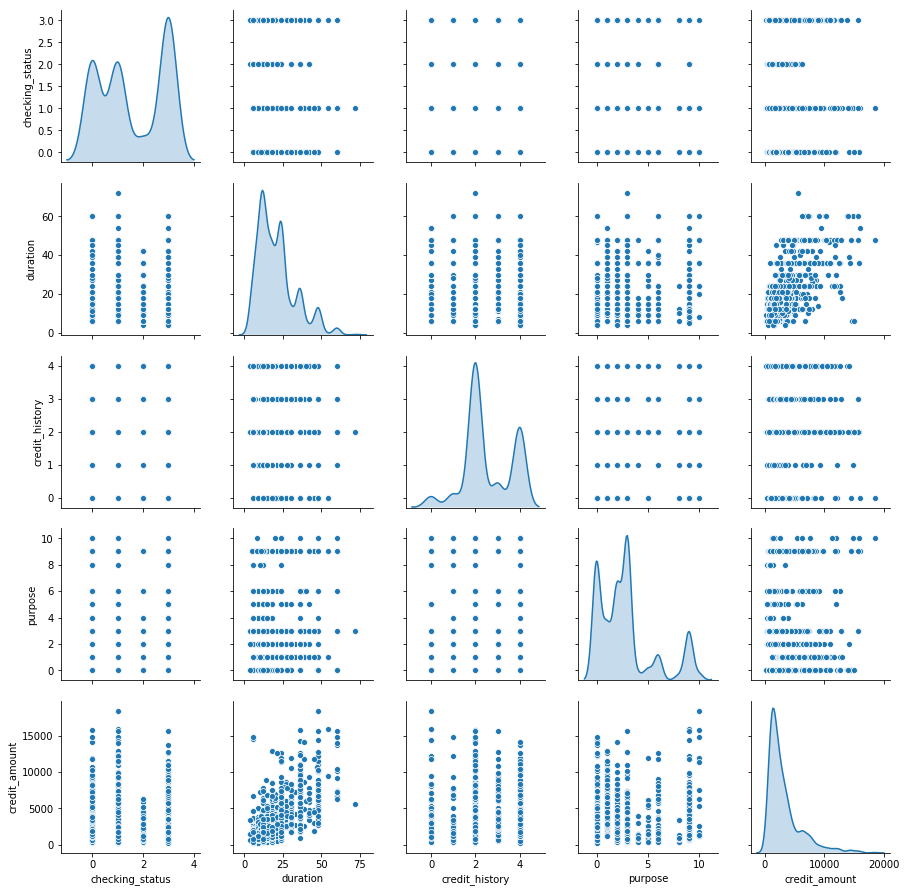

In [19]:
sns.pairplot(data, x_vars =data.columns[:5], y_vars=data.columns[:5],  diag_kind="kde")

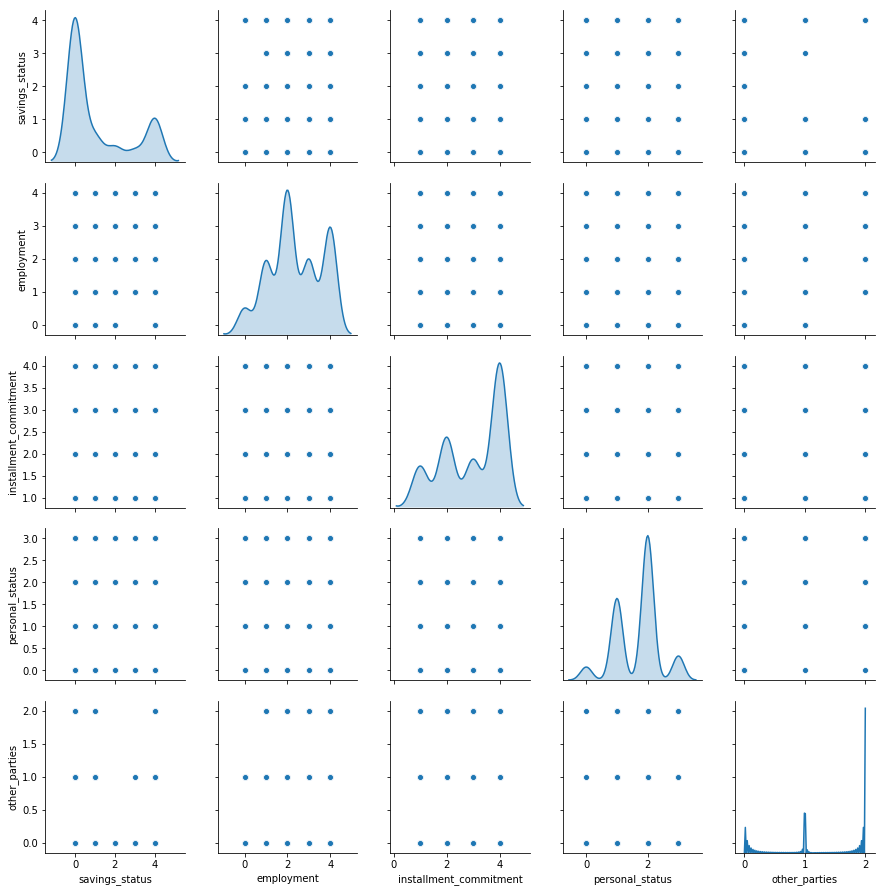

In [20]:
sns.pairplot(data, x_vars =data.columns[5:10], y_vars=data.columns[5:10],  diag_kind="kde")

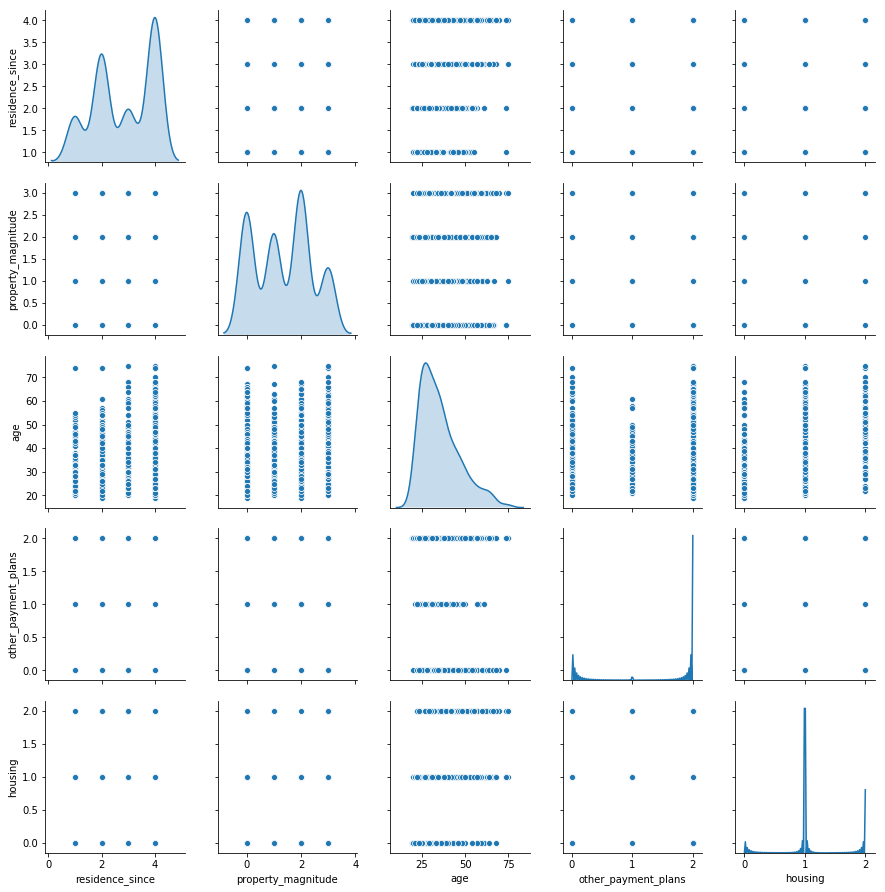

In [21]:
sns.pairplot(data, x_vars =data.columns[10:15], y_vars=data.columns[10:15],  diag_kind="kde")

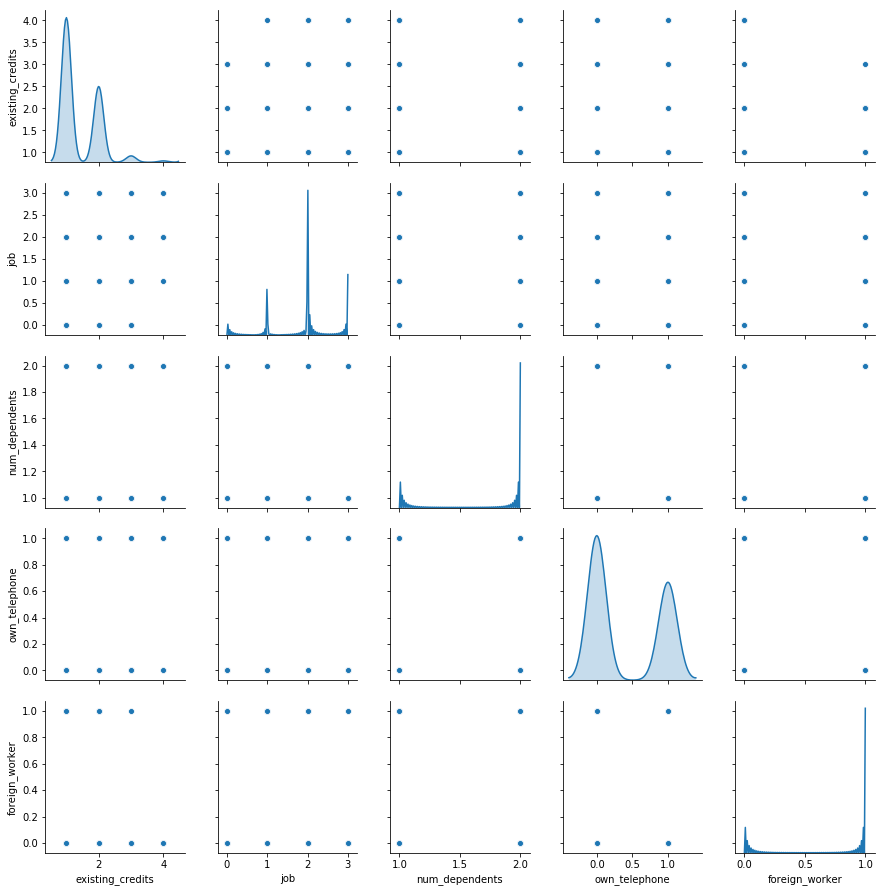

In [22]:
sns.pairplot(data, x_vars =data.columns[15:], y_vars=data.columns[15:],  diag_kind="kde")

# Preparing data to test and train 

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
X_train.shape

(750, 20)

# Pipeline

Principal component analysis (PCA) 

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=3)

Decision Tree Classifier and GradientBoostingClassifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
tree = DecisionTreeClassifier()
gbc = GradientBoostingClassifier(n_estimators=20)

Steps

In [30]:
steps = [("PCA", pca),('Classifier', gbc)]

Pipeline

In [31]:
from sklearn.pipeline import Pipeline

In [32]:
pipeline = Pipeline(steps)

Fit model 

In [33]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('PCA', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('Classifier', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_featur...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))])

Predict

In [34]:
y_predict = pipeline.predict(X_test)

In [35]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1])

Metrics

In [60]:
from sklearn.metrics import confusion_matrix, f1_score, mean_absolute_error, mean_squared_error, accuracy_score, roc_auc_score, roc_curve, confusion_matrix

In [37]:
accuracy_score(y_test, y_predict)

0.74

In [38]:
f1_score(y_test, y_predict)

0.25287356321839083

In [39]:
mean_absolute_error(y_test, y_predict)

0.26

In [40]:
mean_squared_error(y_test, y_predict)

0.26

In [41]:
confusion_matrix(y_test, y_predict)

array([[174,   4],
       [ 61,  11]])

Text(0.5, 0, 'False positive rate')

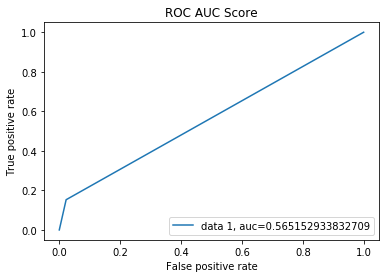

In [70]:
fpr, tpr, _ = roc_curve(y_test,  y_predict)
auc = roc_auc_score(y_test, y_predict)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC AUC Score')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

In [71]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[174,   4],
       [ 61,  11]])

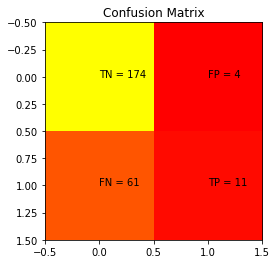

In [90]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.autumn)
plt.title('Confusion Matrix')
tick_marks = np.arange(len(classNames))
s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()